In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

## Download dataset

In [4]:
ROOT_DATA_DIR = "FashionMNISTDir"

train_data = datasets.FashionMNIST(
    root = ROOT_DATA_DIR,
    train = True,
    download = True,
    transform = transforms.ToTensor()
    )


test_data = datasets.FashionMNIST(
    root = ROOT_DATA_DIR,
    train = False, ## <<< Test data
    download = True,
    transform = transforms.ToTensor()
    )

100.0%


Extracting FashionMNISTDir\FashionMNIST\raw\train-images-idx3-ubyte.gz to FashionMNISTDir\FashionMNIST\raw



100.0%


Extracting FashionMNISTDir\FashionMNIST\raw\train-labels-idx1-ubyte.gz to FashionMNISTDir\FashionMNIST\raw



100.0%


Extracting FashionMNISTDir\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to FashionMNISTDir\FashionMNIST\raw



100.0%


Extracting FashionMNISTDir\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to FashionMNISTDir\FashionMNIST\raw



In [5]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [6]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [7]:
label_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3:' Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
    }

## Visualize one sample

In [8]:
def view_sample_img(data, index, label_map):
    plt.imshow(data.data[index], cmap="gray")
    plt.title(f"data label: {label_map[data.targets[index].item()]}")
    plt.axis("off")

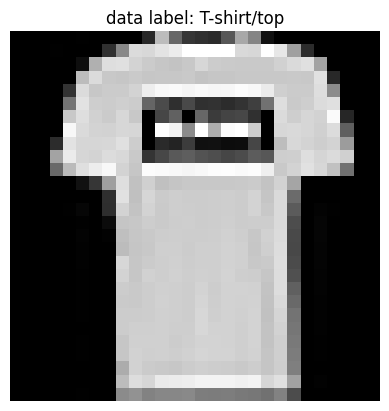

In [9]:
view_sample_img(train_data, index=1, label_map=label_map)

## Create the dataloader

In [10]:
BATCH_SIZE = 64

train_data_loader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
    )

test_data_loader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = True
    )

In [11]:
for data, label in test_data_loader:
    print(data.shape)    
    print(label.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])
